In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten, BatchNormalization, GlobalAveragePooling2D

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float')
x_test = x_test.astype('float')
x_train /= 255
x_test /= 255

11490434/11490434 [==============================] - 1s 0us/step


Test
(60000, 28, 28, 1)
(10000, 28, 28, 1)
5


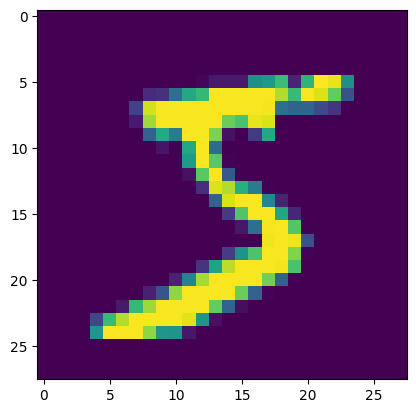

0


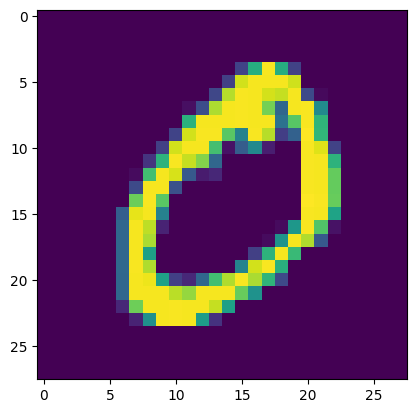

4


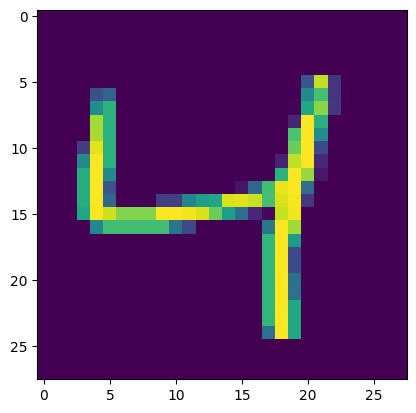

In [2]:
print("Test")
print(x_train.shape)
print(x_test.shape)
for i in range(3):
  print(y_train[i])
  plt.imshow(x_train[i])
  plt.show()



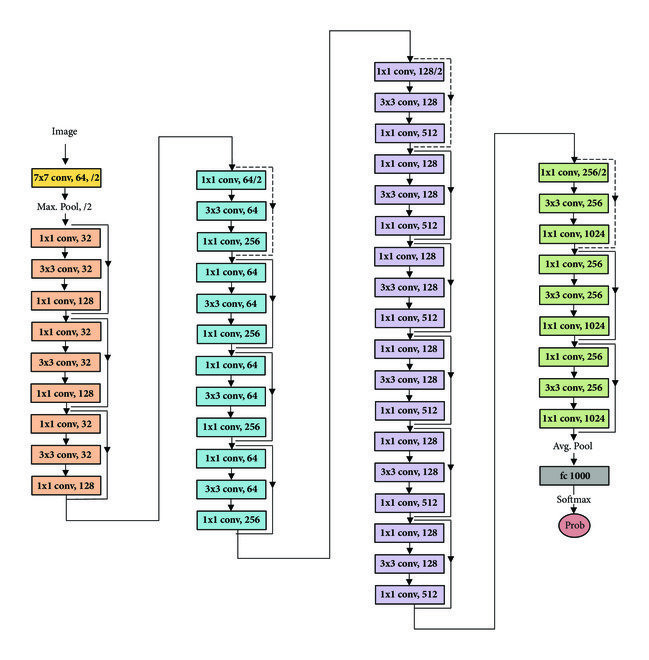

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, GlobalAveragePooling2D, Dense

model = Sequential()
model.add(Conv2D(64, (7, 7), activation='relu', padding='same', input_shape=x_train[0].shape, strides=2))
model.add(MaxPooling2D((3, 3), strides=2))

# Orange
for i in range(3):
    model.add(Conv2D(32, (1, 1), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (1, 1), activation='relu', padding='same'))
    model.add(BatchNormalization())

# Blue
model.add(Conv2D(64, (1, 1), activation='relu', padding='same', strides=2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (1, 1), activation='relu', padding='same'))
model.add(BatchNormalization())

for i in range(3):
  model.add(Conv2D(64, (1, 1), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(256, (1, 1), activation='relu', padding='same'))
  model.add(BatchNormalization())

# Purple
model.add(Conv2D(128, (1, 1), activation='relu', padding='same', strides=2))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (1, 1), activation='relu', padding='same'))
model.add(BatchNormalization())

for i in range(5):
  model.add(Conv2D(128, (1, 1), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(512, (1, 1), activation='relu', padding='same'))
  model.add(BatchNormalization())

model.add(Conv2D(256, (1, 1), activation='relu', padding='same' , strides=2))
model.add(BatchNormalization())
model.add(Conv2D(1024, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (1, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
for i in range(2):
  model.add(Conv2D(256, (1, 1), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(1024, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(256, (1, 1), activation='relu', padding='same'))
  model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))



In [4]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          2080      
                                                                 
 batch_normalization (Batch  (None, 6, 6, 32)          128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 batch_normalization_1 (Bat  (None, 6, 6, 32)          1

In [5]:
model.fit(x_train, y_train, epochs=6  ,batch_size=64  , validation_data=(x_test, y_test))

Epoch 1/6
938/938 [==============================] - 1793s 2s/step - loss: 2.2960 - accuracy: 0.1588 - val_loss: 2.1181 - val_accuracy: 0.2691
Epoch 2/6
938/938 [==============================] - 1782s 2s/step - loss: 1.6359 - accuracy: 0.4091 - val_loss: 1.2910 - val_accuracy: 0.5707
Epoch 3/6
938/938 [==============================] - 1778s 2s/step - loss: 0.9864 - accuracy: 0.6728 - val_loss: 0.7443 - val_accuracy: 0.7783
Epoch 4/6
938/938 [==============================] - 1777s 2s/step - loss: 0.6087 - accuracy: 0.8201 - val_loss: 0.4898 - val_accuracy: 0.8721
Epoch 5/6
938/938 [==============================] - 1772s 2s/step - loss: 0.4199 - accuracy: 0.8848 - val_loss: 0.3762 - val_accuracy: 0.9156
Epoch 6/6
938/938 [==============================] - 1785s 2s/step - loss: 0.3216 - accuracy: 0.9180 - val_loss: 0.2804 - val_accuracy: 0.9327


In [6]:
pred = model.predict(x_test)

313/313 [==============================] - 19s 58ms/step


In [7]:
print(pred.shape)

(10000, 10)


In [8]:
import numpy as np
pred = np.argmax(pred,axis=1)

In [9]:
print(pred)

[7 2 1 ... 4 5 6]


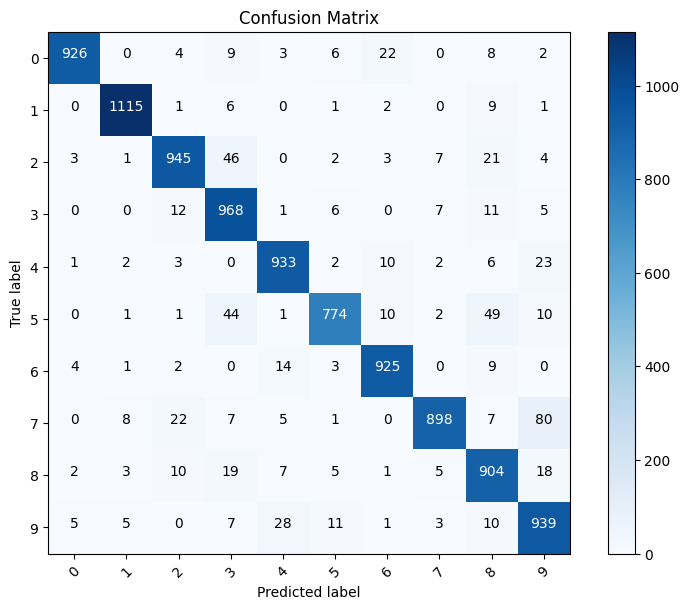

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()


classes = np.unique(np.concatenate((y_test, pred)))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()